In [2]:
from google.colab import files
file=files.upload()

Saving Pokemon.csv to Pokemon.csv


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Pokemon.csv')

In [5]:
a=['HP','Attack','Defense','SpAtk','SpDef','Speed']
b=['red','blue','orange','violet','green','indigo']

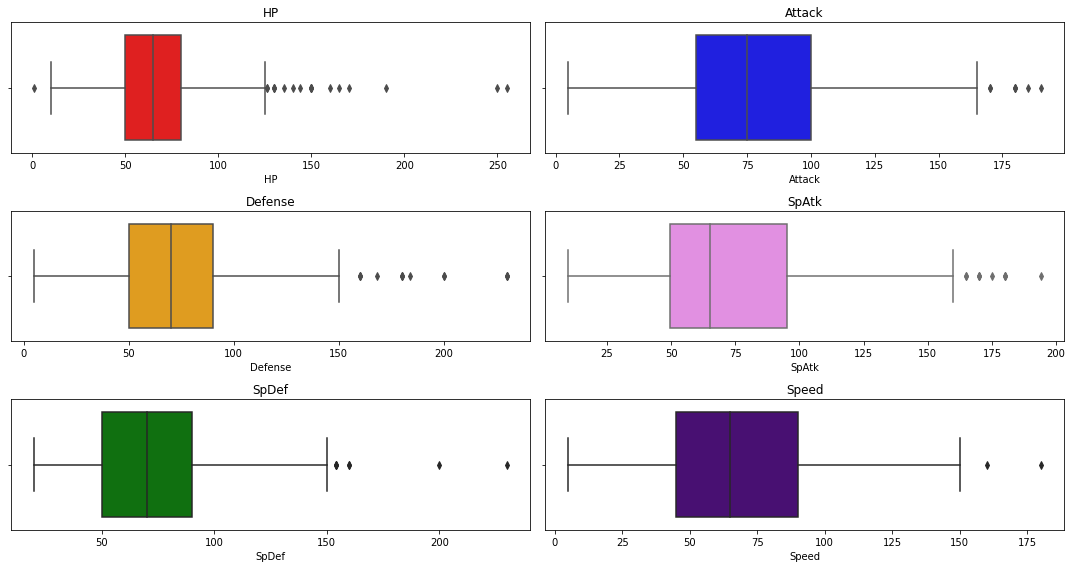

In [8]:
import seaborn as sns
plt.figure(figsize=(15,8))
for i in enumerate(a):
  plt.subplot(3,2,i[0]+1)
  sns.boxplot(df[i[1]],color=b[i[0]])
  plt.tight_layout()
  plt.title(i[1])

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data[['HP','Attack','Defense','SpAtk','SpDef','Speed']]=scaler.fit_transform(data[['HP','Attack','Defense','SpAtk','SpDef','Speed']])

# cluster data set using gap statistic to estimate optimal number of clusters

In [16]:
from gapstat import gapstat
k,labels=gapstat(data[['HP','Attack','Defense','SpAtk','SpDef','Speed']])
print('The estimate optimal numbers of clusters by Gapstatistic method is {}'.format(k))

The estimate optimal numbers of clusters by Gapstat method is 5


#Elbow Method to estimate optimal number of clusters

In [19]:
from sklearn.cluster import KMeans
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(data[['HP','Attack','Defense','SpAtk','SpDef','Speed']])
  sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

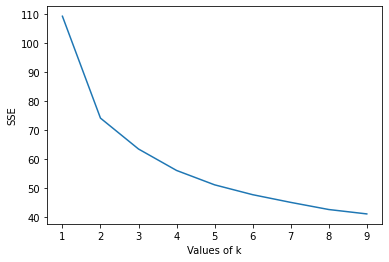

In [20]:
plt.plot(k_rng,sse)
plt.xlabel('Values of k')
plt.ylabel('SSE')

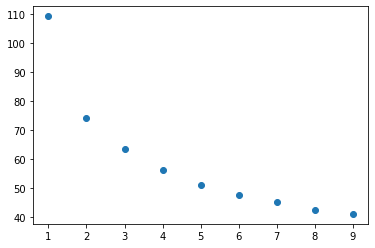

In [21]:
plt.scatter(k_rng,sse)

#Silhouette Method to identify number of clusters 

In [23]:
import sklearn.metrics as metrics

In [44]:
s_score=[]
k_rng=range(2,10)
for k in k_rng:
  i=k-2
  km=KMeans(n_clusters=k)
  km.fit(data[['HP','Attack','Defense','SpAtk','SpDef','Speed']])
  s_score.append(metrics.silhouette_score(data[['HP','Attack','Defense','SpAtk','SpDef','Speed']],km.labels_,metric='euclidean'))
  print('The Silhouette score for k={} is {}'.format(k,s_score[i]))

The Silhouette score for k=2 is 0.287796212739634
The Silhouette score for k=3 is 0.2435673170649409
The Silhouette score for k=4 is 0.23248171393527947
The Silhouette score for k=5 is 0.2300688263786796
The Silhouette score for k=6 is 0.23169671341938763
The Silhouette score for k=7 is 0.1673296786409798
The Silhouette score for k=8 is 0.16724091696803342
The Silhouette score for k=9 is 0.16168693218944255


Text(0, 0.5, 'Silhouette Score')

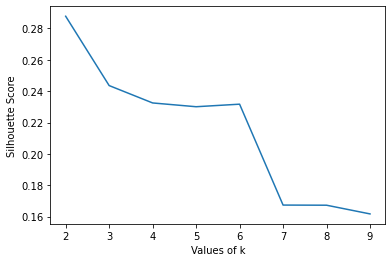

In [45]:
plt.plot(k_rng,s_score)
plt.xlabel('Values of k')
plt.ylabel('Silhouette Score')